#**PFM_06_01 Python ismeretek**#

##**Oszlopmátrix és sormátrix**##

$\color{Blue}{Feladat :}$ Hozzunk létre egy oszlopmátrixot, egy sorvektort és hivatkozzunk egy-egy elemükre!

In [1]:
import numpy as np

column_matrix = np.array([[1],
                          [2],
                          [3]])
row_matrix = np.array([[1, 2, 3]])
print(column_matrix.shape)
print(row_matrix.shape)
print(column_matrix[1,0])
print(row_matrix[0,2])

(3, 1)
(1, 3)
2
3


**Sorvektor és sormátrix közötti különbség**

Figyeljünk a helyes írásmódra:



*   np.array([ [1], [2], [3] ]): 1x3-as sormátrix (dupla szögeletes zárójel),
*   np.array( [1], [2], [3] ): 3 elemből álló sorvektor.




$\color{Blue}{Feladat :}$ Hozzunk létre egy 3x3-as mátrix-ot!

In [2]:
matrix_3_by_3 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(matrix_3_by_3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


##**Mátrixok szorzása**##

Pythonban a @ operátorral mátrixok szorzása végezhető el.

Megjegyzés

Az @ operátort legtöbbször a Numpy csomagban használjuk, de a csomagon kívül is használható.

$\color{Blue}{Példaprogram : }$ Ínyenceknek.

In [3]:
class Matrix:
    def __init__(self, values):
        self.values = values

    def __matmul__(self, other):
        # Mátrixszorzás megvalósítása listák segítségével
        result = [[sum(a * b for a, b in zip(row, col)) for col in zip(*other.values)]
                  for row in self.values]
        return Matrix(result)

    def __repr__(self):
        # Könnyebb olvashatóság érdekében szöveges megjelenítés
        return "\n".join(["\t".join(map(str, row)) for row in self.values])

# Két mátrix definiálása
A = Matrix([[1, 2], [3, 4]])
B = Matrix([[5, 6], [7, 8]])

# Mátrixszorzás @ operátorral
C = A @ B
print("Eredmény mátrix:")
print(C)

Eredmény mátrix:
19	22
43	50


#**PFM_06_02 Fermat elv**#

##**Bevezetés**##

$\color{Red}{Kérdés :}$ Mit mond ki a Fermat elv?

**Fermat elv**

A Fermat-elv szerint a fény két pont között olyan útvonalon halad, amelynek mentén a fény a lehető legrövidebb idő alatt tud eljutni az egyik pontból a másikba.


$\color{Red}{Kérdés :} $ Mi történik olyankor, amikor több lehetséges fényútvonalra is minimális ez az idő?

$\color{Red}{Kérdés :}$ Mi az a törésmutató?

**Törésmutató**

Az elektromágneses hullámok terjedési sebessége egy anyagi közegben kisebb, mint a vákuumban. Ennek a mértéke a törésmutató, ami a következő összefüggés szerint adható meg:

$$n= \frac{c_0}{c}$$


ahol $c_0$ a vákumbeli fénysebesség.

$\color{Red}{Kérdés :} $ Mi a Snell törvény?

**Snell-törvény**

Két eltérő törésmutatójú közeg határán a fény terjedési iránya a Snell törvénynek megfelelően változik meg:

$n_1 \cdot sin(\theta_1)=n_2 \cdot sin(\theta_2)$

$\color{Red}{Kérdés :}$ Mi a kapcsolat a Snell-törvény és a Fermat-elv között?

##**Snell-törvény igazolása a Fermat-elvvel**##

$\color{Blue}{Feladat :}$ Írjunk kódot a Snell-törvény igazolására a Fermat-elv alapján!

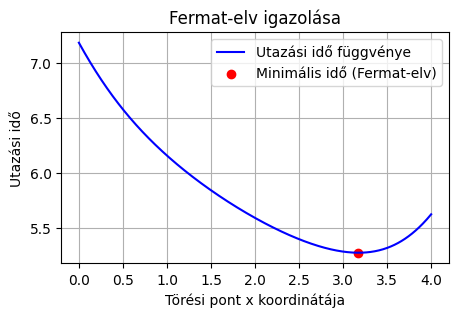

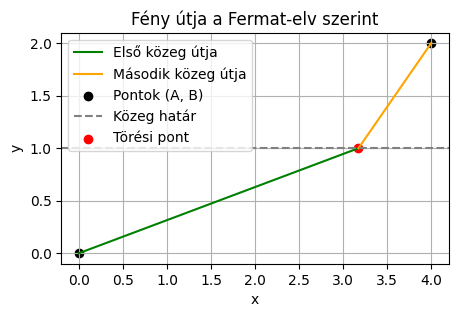

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Közeg paraméterek (törésmutatók)
n1 = 1.0  # Levegő
n2 = 1.5  # Üveg

# Pontok koordinátái
A = [0, 0]  # Indulási pont
B = [4, 2]  # Érkezési pont
interface_y = 1  # Közeg határa

# Utazási idő kiszámítása adott törési pont esetén
def travel_time(x):
    d1 = ((x - A[0])**2 + (interface_y - A[1])**2)**0.5 * n1  # Első közeg
    d2 = ((B[0] - x)**2 + (B[1] - interface_y)**2)**0.5 * n2  # Második közeg
    return d1 + d2

# Lehetséges törési pontok x koordinátája
x_vals = np.linspace(0, 4, 500)

# Idők számítása minden x-re (numpy tömbként)
times = np.array([travel_time(x) for x in x_vals])

# Minimális idő és törési pont keresése numpy segítségével
min_index = np.argmin(times)  # Minimális idő indexe
min_time = times[min_index]  # Minimális utazási idő
optimal_x = x_vals[min_index]  # Optimális törési pont

# Optimális törési pont
P_optimal = [optimal_x, interface_y]

# Grafikus ábrázolás
plt.figure(figsize=(5, 3))
plt.plot(x_vals, times, label="Utazási idő függvénye", color="blue")
plt.scatter(optimal_x, min_time, color="red", label="Minimális idő (Fermat-elv)")
plt.xlabel("Törési pont x koordinátája")
plt.ylabel("Utazási idő")
plt.title("Fermat-elv igazolása")
plt.legend()
plt.grid()

# Geometriai ábra
plt.figure(figsize=(5, 3))
plt.plot([A[0], P_optimal[0]], [A[1], P_optimal[1]], label="Első közeg útja", color="green")
plt.plot([P_optimal[0], B[0]], [P_optimal[1], B[1]], label="Második közeg útja", color="orange")
plt.scatter([A[0], B[0]], [A[1], B[1]], color="black", label="Pontok (A, B)")
plt.axhline(y=interface_y, color="gray", linestyle="--", label="Közeg határ")
plt.scatter(P_optimal[0], P_optimal[1], color="red", label="Törési pont")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fény útja a Fermat-elv szerint")
plt.legend()
plt.grid()
plt.show()

#**PFM_06_03 Sugárterjedés mátrix alapú leírása**#

##**Bevezetés**##

**Fénysugár áthaladása egy optikai elemen**


$\begin{bmatrix}
y_1 \\
\theta_1
\end{bmatrix}=\begin{bmatrix}
A & B\\
C & D
\end{bmatrix} \cdot \begin{bmatrix}
y_0 \\
\theta_0
\end{bmatrix}$

Ahol:


*   $y$: a távolság az optikai tengelytől
*   $\theta$: az optikai tengellyel bezárt szög (értelemszerűen radiánban).
* $y_1, \theta_1$: a fénysugár távolsága az optikai tengelytől és az optikai tengelllyel bezárt terjedési szög az optikai elemen való áthaladás után.


**Összetett optikai rendszer ABCD mátrixa**

$\begin{bmatrix}
y_n \\
\theta_n
\end{bmatrix}= M_{n} \cdot M_{n-1} \cdot ...M_1\cdot \begin{bmatrix}
y_0 \\
\theta_0
\end{bmatrix}$

##**Paraxiális közelítés**##

$\color{Red}{Kérdés :}$ Mi a paraxiális közelítés és milyen közelítést lehet alkalmazni a paraxiális közelítésben?

$\color{Blue}{Feladat :}$ Írjunk kódot amivel egy adott problémára "ellenőrizni" lehet a paraxiális közelítés jóságát!

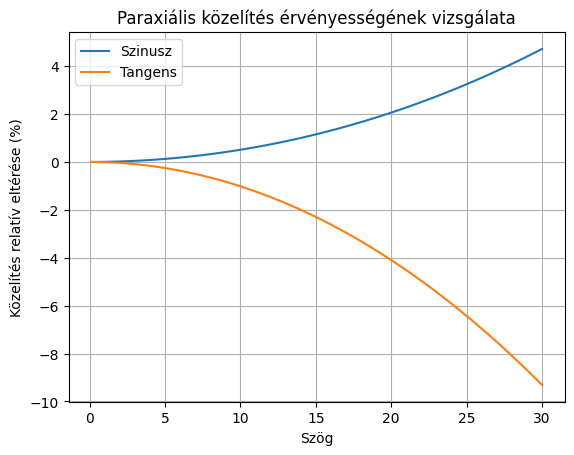

In [5]:
import numpy as np
import matplotlib.pyplot as plt
theta_degree = np.linspace(0.1, 30, 100)
theta= np.radians(theta_degree)
rel_dev_sin = 100*(theta-np.sin(theta))/np.sin(theta)
rel_dev_tan = 100*(theta-np.tan(theta))/np.tan(theta)
plt.plot(theta_degree, rel_dev_sin, label="Szinusz")
plt.plot(theta_degree,rel_dev_tan, label="Tangens")
plt.grid()
plt.xlabel("Szög")
plt.ylabel("Közelítés relatív eltérése (%)")
plt.title("Paraxiális közelítés érvényességének vizsgálata")
plt.legend()
plt.show()

##**Szabad-tér terjedés**##

$\color{Red}{Kérdés :}$ Mi a szabad térben történő terjedés ABCD mátrixa?

$\color{Blue}{Feladat :}$ Írjunk kódot a szabad térben történő terjedés leírására!

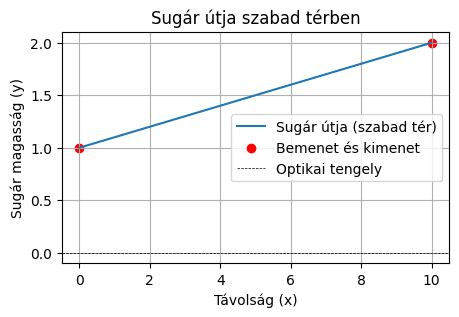

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Szabad tér mátrix
def free_space_matrix(L):
    return np.array([[1, L],
                     [0, 1]])

# Sugár kezdeti állapota
ray_in = np.array([[1], [0.1]])  # [magasság (y), szög (theta)]

# Szabad tér hossza
L = 10
M_free = free_space_matrix(L)

# Sugár kimeneti állapota
ray_out = M_free @ ray_in

# Sugár koordinátáinak kiszámítása a szabad térben
x = np.linspace(0, L, 100)
y = ray_in[0, 0] + ray_in[1, 0] * x  # y = y0 + theta * x

# Vizualizáció
plt.figure(figsize=(5, 3))
plt.plot(x, y, label="Sugár útja (szabad tér)")
plt.scatter([0, L], [ray_in[0, 0], ray_out[0, 0]], color="red", label="Bemenet és kimenet")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--", label="Optikai tengely")
plt.xlabel("Távolság (x)")
plt.ylabel("Sugár magasság (y)")
plt.title("Sugár útja szabad térben")
plt.legend()
plt.grid()
plt.show()


$\color{Blue}{Feladat :}$ Írjunk egyszerű kódot ami a szabad tér terjedés ABCD mátrixát használja!

In [7]:
L = 100
def free_space_matrix(L):
  return np.array([[1, L],
                   [0, 1]])
ray_in = np.array([[1], [0.1]])
M_free_space_short = free_space_matrix(20)
M_free_space_long = free_space_matrix(80)
ray_out = M_free_space_long @ M_free_space_short @ ray_in
print(f"Távolság a tengelytől:{ray_out[0,0]}")
print(f"Szög az optikai tengelyre:{ray_out[1,0]}")

Távolság a tengelytől:11.0
Szög az optikai tengelyre:0.1


##**Snell törvény mátrixformalizmusban**##

$\color{Red}{Kérdés :}$ Mi a közeg határán történő törés  ABCD mátrixa?

**Fénytörést leíró ABCD mátrix**

$M_{ft}=\begin{bmatrix}
1 & 0\\
0 & {\frac{n_1}{n_2}}
\end{bmatrix}$

$\color{Red}{Kérdés :}$ Hogyan lehet a korábban a Fermat-elvvel igazolt Snell törvényt mátrixműveletekkel szimulálni?

$\begin{bmatrix}
y_3 \\
\theta_3
\end{bmatrix}= M_{szt} \cdot M_{ft} \cdot M_{szt}\cdot \begin{bmatrix}
y_0 \\
\theta_0
\end{bmatrix}$

$\color{Blue}{Feladat :}$ Szimuláljuk a fény közeghatáron történő  áthaladását ABCD mátrixok segítségével!

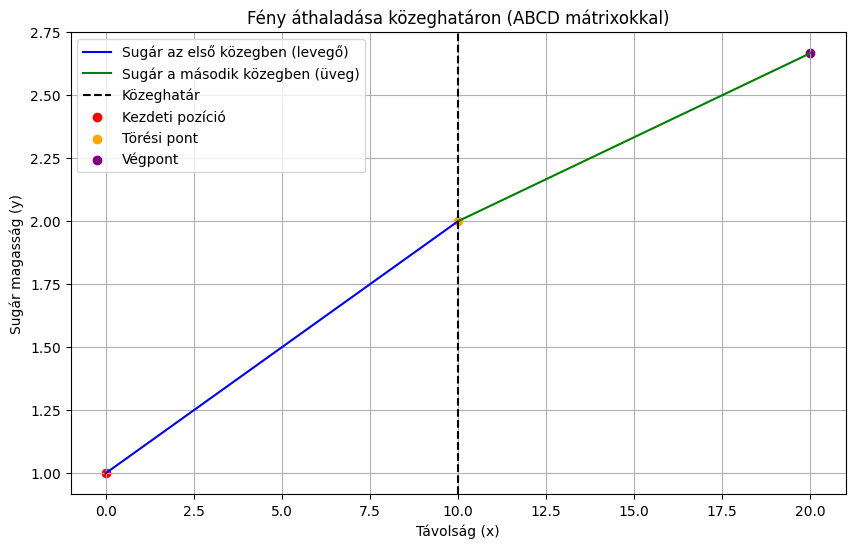

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Mátrixok
def refraction_matrix(n1, n2):
    """ABCD mátrix közeghatárhoz."""
    return np.array([[1, 0],
                     [0, n1 / n2]])

def free_space_matrix(L):
    """ABCD mátrix szabad térhez adott távolságra."""
    return np.array([[1, L],
                     [0, 1]])

# Paraméterek
n1 = 1.0  # Első közeg törésmutatója (pl. levegő)
n2 = 1.5  # Második közeg törésmutatója (pl. üveg)
L = 10    # Szabad tér hossza a közeghatár előtt és után

# Sugár kezdeti állapota (magasság és szög)
ray_in = np.array([[1], [0.1]])  # [y, theta]

# Közeghatár mátrixa
M_refraction = refraction_matrix(n1, n2)

# Szabad tér mátrixai
M_free_before = free_space_matrix(L)
M_free_after = free_space_matrix(L)

# Teljes rendszer mátrixa: szabad tér -> közeghatár -> szabad tér
M_total = M_free_after @ M_refraction @ M_free_before

# Sugár állapotai
ray_before = M_free_before @ ray_in  # Sugár a közeghatár előtt
ray_after = M_total @ ray_in         # Sugár a közeghatár után

# Sugár követése a térben
x1 = np.linspace(0, L, 100)  # Szabad tér az első közegben
x2 = np.linspace(L, 2*L, 100)  # Szabad tér a második közegben

y1 = ray_in[0, 0] + ray_in[1, 0] * x1  # Sugár útja az első közegben
theta_transmitted = ray_after[1, 0]  # Törés utáni szög
y2 = ray_before[0, 0] + theta_transmitted * (x2 - L)  # Sugár útja a második közegben

# Vizualizáció
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label="Sugár az első közegben (levegő)", color="blue")
plt.plot(x2, y2, label="Sugár a második közegben (üveg)", color="green")
plt.axvline(x=L, color="black", linestyle="--", label="Közeghatár")
plt.scatter([0], [ray_in[0, 0]], color="red", label="Kezdeti pozíció")
plt.scatter([L], [ray_before[0, 0]], color="orange", label="Törési pont")
plt.scatter([2*L], [ray_after[0, 0]], color="purple", label="Végpont")
plt.xlabel("Távolság (x)")
plt.ylabel("Sugár magasság (y)")
plt.title("Fény áthaladása közeghatáron (ABCD mátrixokkal)")
plt.legend()
plt.grid()
plt.show()

##**Plánparallel lemez hatása fényterjedésre**##

$\color{Red}{Kérdés :}$ Milyen hatása van egy plánparallel lemeznek a ráeső fényre?

$\color{Blue}{Feladat :}$ Szimuláljuk a különböző vastagságú plánparallel lemezek hatását a lemezre szög alatt beeső fényre!

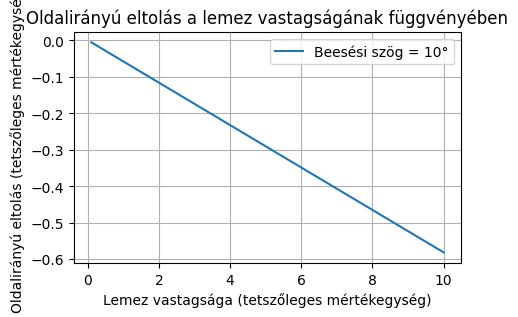

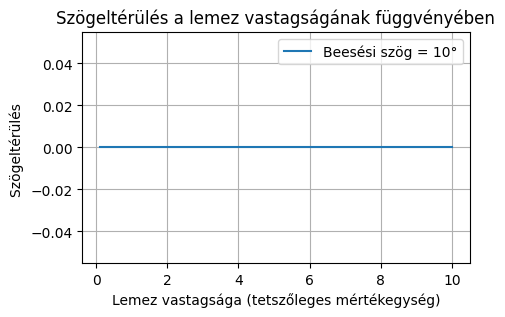

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Paraméterek
n1 = 1.0  # Levegő törésmutatója
n2 = 1.5  # Lemez törésmutatója
theta_incident_degree = 10  # Beesési szög fokban (kis szög a paraxiális közelítéshez)
theta_incident_radian = np.radians(theta_incident_degree)  # Beesési szög radiánban

# Lemez vastagságának tartománya
d_values = np.linspace(0.1, 10, 100)  # Vastagság tetszőleges mértékegységben

# Oldalirányú eltolás számítása minden vastagságra
lateral_shifts = []
angle_variation = []

for d in d_values:
    # Snell-törvény alkalmazása (paraxiális közelítésben)
    theta2 = (n1 / n2) * theta_incident_radian  # Törési szög közelítése

    # Mátrixok definiálása
    M_refraction_1 = np.array([[1, 0], [0, n1 / n2]])
    M_propagation = np.array([[1, d], [0, 1]])
    M_refraction_2 = np.array([[1, 0], [0, n2 / n1]])

    # Kombinált mátrix
    M_total = M_refraction_2 @ M_propagation @ M_refraction_1

    # Beeső sugár reprezentációja
    ray_in = np.array([[0], [theta_incident_radian]])

    # Kilépő sugár számítása
    ray_out = M_total @ ray_in

    # Szögváltozás számítása
    angle_variation.append(ray_out[1,0]-ray_in[1,0])
    unaltered = ray_in[0,0] + d * ray_in[1,0]
    lateral_shifts.append(ray_out[0,0]-unaltered)

# Átszámítás NumPy tömbbé
lateral_shifts = np.array(lateral_shifts)
angle_variation = np.array(angle_variation)
# Grafikon megjelenítése
plt.figure(figsize=(5, 3))
plt.plot(d_values, lateral_shifts, label=f"Beesési szög = {theta_incident_degree}°")
plt.xlabel("Lemez vastagsága (tetszőleges mértékegység)")
plt.ylabel("Oldalirányú eltolás (tetszőleges mértékegység)")
plt.title("Oldalirányú eltolás a lemez vastagságának függvényében")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(5, 3))
plt.plot(d_values, angle_variation, label=f"Beesési szög = {theta_incident_degree}°")
plt.xlabel("Lemez vastagsága (tetszőleges mértékegység)")
plt.ylabel("Szögeltérülés ")
plt.title("Szögeltérülés a lemez vastagságának függvényében")
plt.legend()
plt.grid(True)
plt.show()


$\color{Blue}{Feladat :}$ Vizsgáljuk meg ugyanerre a problémára a szögfüggést!

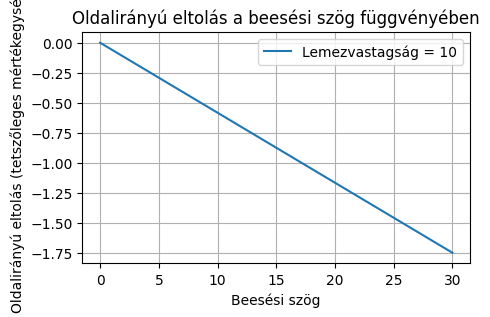

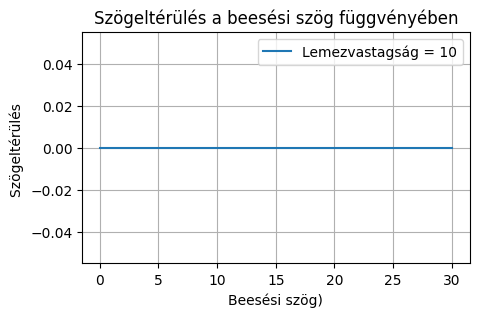

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Paraméterek
n1 = 1.0  # Levegő törésmutatója
n2 = 1.5  # Lemez törésmutatója
d_value = 10
theta_values_degree = np.linspace(0, 30, 100)
theta_values_radian = np.radians(theta_values_degree)

# Oldalirányú eltolás számítása minden vastagságra
lateral_shifts = []
angle_variation = []

for theta in theta_values_radian:
    # Snell-törvény alkalmazása (paraxiális közelítésben)
    theta2 = (n1 / n2) * theta  # Törési szög közelítése

    # Mátrixok definiálása
    M_refraction_1 = np.array([[1, 0], [0, n1 / n2]])
    M_propagation = np.array([[1, d_value], [0, 1]])
    M_refraction_2 = np.array([[1, 0], [0, n2 / n1]])

    # Kombinált mátrix
    M_total = M_refraction_2 @ M_propagation @ M_refraction_1

    # Beeső sugár reprezentációja
    ray_in = np.array([[0], [theta]])

    # Kilépő sugár számítása
    ray_out = M_total @ ray_in

    # Szögváltozás számítása
    angle_variation.append(ray_out[1,0]-ray_in[1,0])
    unaltered = ray_in[0,0] + d_value * ray_in[1,0]
    lateral_shifts.append(ray_out[0,0]-unaltered)

# Átszámítás NumPy tömbbé
lateral_shifts = np.array(lateral_shifts)
angle_variation = np.array(angle_variation)
# Grafikon megjelenítése
plt.figure(figsize=(5, 3))
plt.plot(theta_values_degree, lateral_shifts, label=f"Lemezvastagság = {d_value}")
plt.xlabel("Beesési szög")
plt.ylabel("Oldalirányú eltolás (tetszőleges mértékegység)")
plt.title("Oldalirányú eltolás a beesési szög függvényében")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(5, 3))
plt.plot(theta_values_degree, angle_variation, label=f"Lemezvastagság = {d_value}")
plt.xlabel("Beesési szög)")
plt.ylabel("Szögeltérülés ")
plt.title("Szögeltérülés a beesési szög függvényében")
plt.legend()
plt.grid(True)
plt.show()
